# Saturation analysis
IsoTools provides two approaches to assess the required depth of sequencing:

* Saturation analysis ([plot_rarefaction](../isotoolsAPI.html?highlight=plot_rarefaction#isotools.plots.plot_rarefaction)):
    * Models the propability of observing a transcript with at least n reads. 
    * Depends on the expression level on the transcript
    * E.g.: "With the given seq depth, the probability of observing a 1 TPM transcript is > 80%"    
* Rarefaction analysis ([plot_saturation](../isotoolsAPI.html?highlight=plot_saturation#isotools.plots.plot_saturation))
    * Subsamples the reads and counts the number of observed transcripts.
    * Helps estimating, how much more transcripts would be observed with deeper sequencing.
    * If the curve is relativly flat towards the right, deeper sequencing would yield little additional transcripts.
    * Can be restricted to a subset of transcripts (e.g. only matching reference annotation or only novel genes)
    
The following steps assume you have run the [previous tutorial](03_transcriptome_reconstruction.html), and prepared a transcriptome pkl file PacBio_isotools.pkl from the [demonstration dataset](https://nc.molgen.mpg.de/cloud/index.php/s/zYe7g6qnyxGDxRd).

In [1]:
from isotools import Transcriptome

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools.pkl')

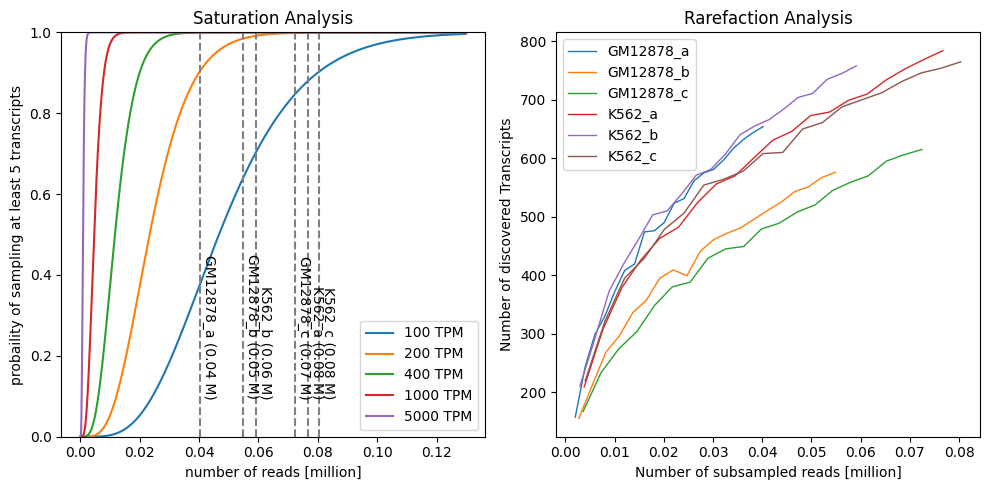

In [2]:
from isotools.plots import plot_saturation, plot_rarefaction
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10,5)
fig, axs=plt.subplots(1,2)

plot_saturation(isoseq,cov_th=5, expr_th=[100, 200, 400, 1000, 5000],
                x_range=(1e2,1.3e5,1e2), ax=axs[0])

rarefraction, total=isoseq.rarefaction(min_coverage=2, tr_filter={'query':'FSM'})
plot_rarefaction(rarefraction, total=total, ax=axs[1])

fig.tight_layout()



The left figure shows the probability of observing 5 reads of a hypothetical transcript expressed at different levels, from 100 TPM to 5000 TPM (note that subsampling reads from one chromosome only scales the expression level), depending on the sequencing depth. With 20k reads, the probability of observing a 200 TPM transcript would be about 40% (orange line).

The right figure shows the number of different full splice match (FSM) transcripts, depending on the number of reads. Generaly, the deeper the sequencing, the less new transcripts are discovered, indicating beginning saturation. Lower curves, such as with GM12878_c (green) indicate lower library complexity (e.g. less different templates in the sample).